In [72]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
import seaborn as sns
import matplotlib.pyplot as plt

In [73]:
data=pd.read_csv(r"C:\DecisionTree\Iris.csv")

In [74]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [75]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [76]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [77]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [78]:
data.duplicated().sum()

np.int64(0)

In [79]:
data["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [80]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [81]:
data = data.drop(['Id'], axis=1)

In [82]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


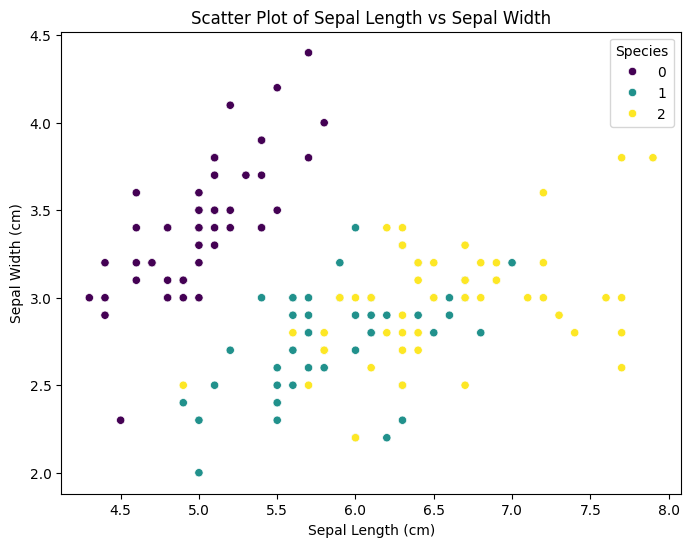

In [109]:
# Scatter plot using seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x="SepalLengthCm", y="SepalWidthCm", hue="Species", palette="viridis")
plt.title("Scatter Plot of Sepal Length vs Sepal Width")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.legend(title="Species")
plt.show()

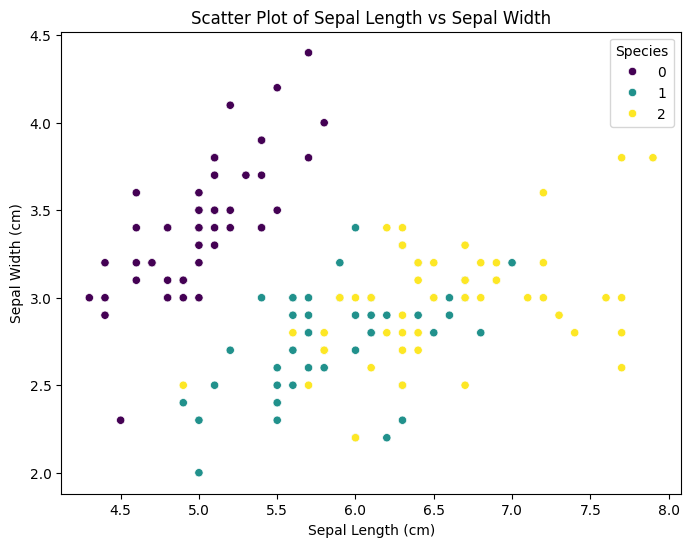

In [110]:
# Scatter plot using seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x="SepalLengthCm", y="SepalWidthCm", hue="Species", palette="viridis")
plt.title("Scatter Plot of Sepal Length vs Sepal Width")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.legend(title="Species")
plt.show()


In [83]:

# Define feature names and class names
feature_names = data.columns[:-1]  # All columns except 'Species'
class_names = data['Species'].unique().astype(str)  # Unique species names

In [84]:
X = data.drop(["Species"], axis=1)
y = data["Species"]

In [85]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [86]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [87]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['Species'] = label_encoder.fit_transform(data['Species'])

In [88]:
from sklearn.preprocessing import StandardScaler

In [89]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [90]:
from sklearn.preprocessing import LabelEncoder

# Encode the 'Species' column into numerical values
label_encoder = LabelEncoder()
data['Species'] = label_encoder.fit_transform(data['Species'])

In [91]:
# Define features (X) and target (y)
X = data.drop(['Species'], axis=1)
y = data['Species']

In [92]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [93]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [94]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [95]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [96]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [97]:
# Train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [98]:
# Define feature names and class names
feature_names = X.columns  # Feature names from the dataset
class_names = label_encoder.classes_  # Original class names

In [99]:
# Define feature names and class names
feature_names = X.columns  # Feature names from the dataset
class_names = [str(cls) for cls in label_encoder.classes_]  # Convert class names to strings

In [100]:
# Initialize and train the Decision Tree Classifier
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

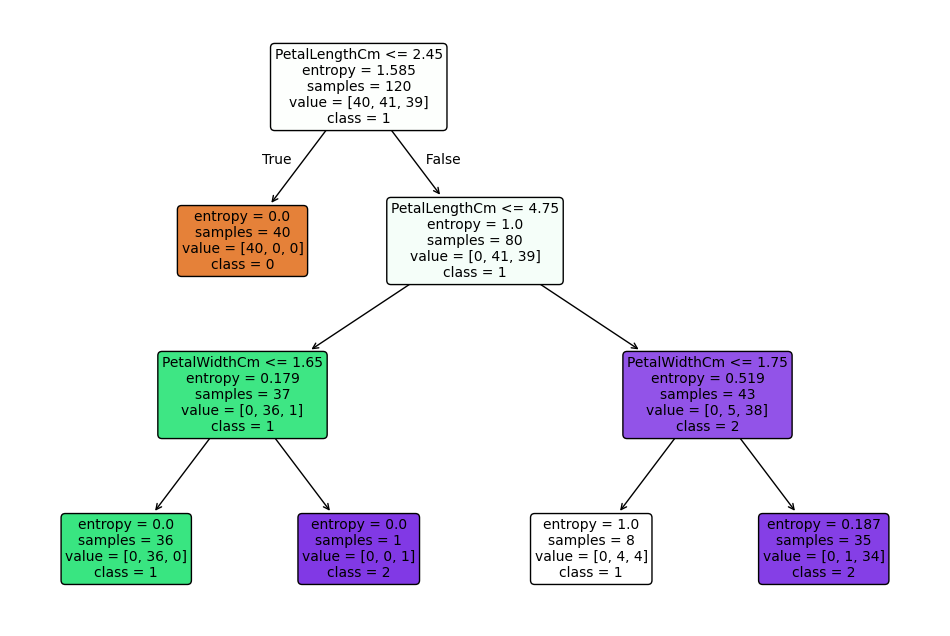

In [101]:
# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=feature_names, class_names=class_names, rounded=True, fontsize=10)
plt.show()

In [102]:
# Predict on the test set
y_pred = clf.predict(X_test)

In [103]:
# Evaluate accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [104]:
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [108]:
data.value_counts()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
4.9            3.1           1.5            0.1           0          3
5.8            2.7           5.1            1.9           2          2
               4.0           1.2            0.2           0          1
5.9            3.0           4.2            1.5           1          1
6.2            3.4           5.4            2.3           2          1
                                                                    ..
5.5            2.3           4.0            1.3           1          1
               2.4           3.7            1.0           1          1
                             3.8            1.1           1          1
               2.5           4.0            1.3           1          1
7.9            3.8           6.4            2.0           2          1
Name: count, Length: 147, dtype: int64

In [105]:
# Generate a confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [106]:

# Generate a classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))




Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

